In [1]:
## Part 3

# Set-up, data import, and check

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib as mpl

# This lets us refer to the pyplot part of matplot lib more easily. Just use plt!
import matplotlib.pyplot as plt

# importing the style package
from matplotlib import style
from matplotlib.ticker import StrMethodFormatter


# Keeps warnings from cluttering up our notebook. 
#import warnings
#warnings.filterwarnings('ignore')

dsf = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/crsp_022722.csv')

dsf.info()
dsf.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   2271 non-null   int64  
 1   date     2271 non-null   int64  
 2   TICKER   2271 non-null   object 
 3   CUSIP    2271 non-null   object 
 4   DISTCD   61 non-null     float64
 5   DIVAMT   61 non-null     float64
 6   FACPR    61 non-null     float64
 7   FACSHR   61 non-null     float64
 8   PRC      2271 non-null   float64
 9   VOL      2271 non-null   int64  
 10  RET      2271 non-null   float64
 11  SHROUT   2271 non-null   int64  
 12  CFACPR   2271 non-null   int64  
 13  CFACSHR  2271 non-null   int64  
 14  sprtrn   2271 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 266.3+ KB


,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,20190102,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,20190103,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,20190104,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,20190107,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,20190108,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


In [2]:
dsf = dsf[(dsf['PRC'].notna()) & (dsf['RET'].notna())]

dsf['date']=pd.to_datetime(dsf['date'], format='%Y%m%d')

dsf.info()

dsf.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PERMNO   2271 non-null   int64         
 1   date     2271 non-null   datetime64[ns]
 2   TICKER   2271 non-null   object        
 3   CUSIP    2271 non-null   object        
 4   DISTCD   61 non-null     float64       
 5   DIVAMT   61 non-null     float64       
 6   FACPR    61 non-null     float64       
 7   FACSHR   61 non-null     float64       
 8   PRC      2271 non-null   float64       
 9   VOL      2271 non-null   int64         
 10  RET      2271 non-null   float64       
 11  SHROUT   2271 non-null   int64         
 12  CFACPR   2271 non-null   int64         
 13  CFACSHR  2271 non-null   int64         
 14  sprtrn   2271 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 283.9+ KB


,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,2019-01-02,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,2019-01-03,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,2019-01-04,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,2019-01-07,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,2019-01-08,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


In [3]:
# I haven't set an index yet!

dsf.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270],
           dtype='int64', length=2271)

In [4]:
## Part 4

dsf['PRC_ADJ'] = dsf['PRC'] / dsf['CFACPR']


In [5]:
dsf.set_index(['PERMNO', 'date'])

TICKER     CUSIP  DISTCD  DIVAMT  FACPR  FACSHR        PRC  \
PERMNO date                                                                    
11850  2019-01-02    XOM  30231G10     NaN     NaN    NaN     NaN   69.69000   
       2019-01-03    XOM  30231G10     NaN     NaN    NaN     NaN   68.62000   
       2019-01-04    XOM  30231G10     NaN     NaN    NaN     NaN   71.15000   
       2019-01-07    XOM  30231G10     NaN     NaN    NaN     NaN   71.52000   
       2019-01-08    XOM  30231G10     NaN     NaN    NaN     NaN   72.04000   
...                  ...       ...     ...     ...    ...     ...        ...   
89468  2021-12-27    TLT  46428743     NaN     NaN    NaN     NaN  148.88000   
       2021-12-28    TLT  46428743     NaN     NaN    NaN     NaN  148.28999   
       2021-12-29    TLT  46428743     NaN     NaN    NaN     NaN  146.67000   
       2021-12-30    TLT  46428743     NaN     NaN    NaN     NaN  147.89999   
       2021-12-31    TLT  46428743     NaN     NaN    NaN     NaN  148.19000   

                        VOL       RET   SHROUT  CFACPR  CFACSHR    sprtrn  \
PERMNO date                                                                 
11850  2019-01-02  16727246  0.021997  4233807       1        1  0.001269   
       2019-01-03  13866115 -0.015354  4233807       1        1 -0.024757   
       2019-01-04  16043642  0.036870  4233807       1        1  0.034336   
       2019-01-07  10844159  0.005200  4233807       1        1  0.007010   
       2019-01-08  11438966  0.007271  4233807       1        1  0.009695   
...                     ...       ...      ...     ...      ...       ...   
89468  2021-12-27   7854290  0.002424   132000       1        1  0.013839   
       2021-12-28   9173504 -0.003963   133200       1        1 -0.001010   
       2021-12-29  11763496 -0.010925   133400       1        1  0.001402   
       2021-12-30  10340148  0.008386   133400       1        1 -0.002990   
       2021-12-31  13389734  0.001961   132800       1        1 -0.002626   

                     PRC_ADJ  
PERMNO date                   
11850  2019-01-02   69.69000  
       2019-01-03   68.62000  
       2019-01-04   71.15000  
       2019-01-07   71.52000  
       2019-01-08   72.04000  
...                      ...  
89468  2021-12-27  148.88000  
       2021-12-28  148.28999  
       2021-12-29  146.67000  
       2021-12-30  147.89999  
       2021-12-31  148.19000  

[2271 rows x 14 columns]

In [6]:
dsf['PRC_ADJ_LAG1'] = dsf.groupby(['PERMNO'])['PRC_ADJ'].shift(1)
dsf['DIVAMT']=dsf['DIVAMT'].fillna(0)


In [7]:
dsf['RETURN'] = (dsf['PRC_ADJ'] + dsf['DIVAMT']) / dsf['PRC_ADJ_LAG1'] - 1

dsf['RET_DIFF'] = dsf['RETURN'] - dsf['RET']

dsf['RET_DIFF'].describe()

count    2.268000e+03
mean     2.877561e-05
std      5.352483e-04
min     -5.893364e-07
25%     -2.504981e-07
50%      4.375622e-09
75%      2.611786e-07
max      1.281151e-02
Name: RET_DIFF, dtype: float64

In [8]:
# Part 5

dsf['RET_G'] = dsf['RET'] + 1
dsf['RET_C'] = dsf.groupby(['PERMNO'])['RET_G'].cumprod().sub(1)


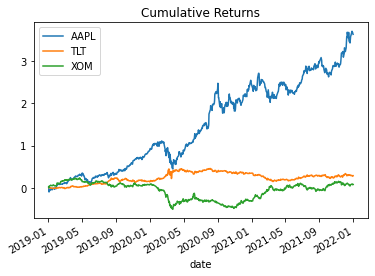

In [9]:
# Part 6

dsf.set_index('date', inplace=True)
dsf.groupby('TICKER')['RET_C'].plot(legend=True, title = 'Cumulative Returns');

In [10]:
dsf.reset_index()

dsf_wide = dsf.pivot_table(index='date', columns='TICKER', values='RET_C')

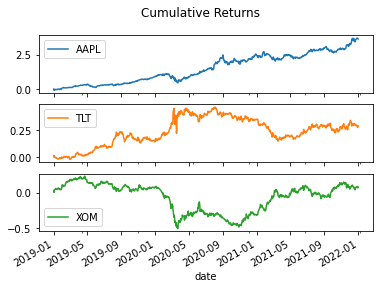

In [17]:
dsf_wide.plot(subplots=True, title = 'Cumulative Returns');


In [12]:
# Part 7

dsf_ret_wide = dsf.pivot_table(index='date', columns='TICKER', values='RET')
dsf_price_wide = dsf.pivot_table(index='date', columns='TICKER', values='PRC_ADJ')


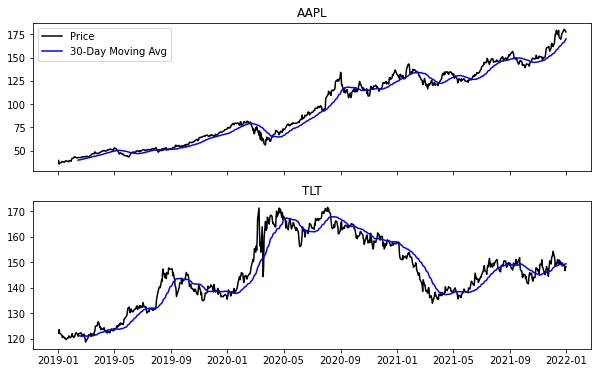

In [13]:

# Part 8

dsf_price_wide['aapl_sma_30'] = dsf_price_wide['AAPL'].rolling(window=30).mean()
dsf_price_wide['tlt_sma_30'] = dsf_price_wide['TLT'].rolling(window=30).mean()

fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10, 6))

axs[0].plot(dsf_price_wide.AAPL, 'k', label = 'Price')
axs[0].plot(dsf_price_wide.aapl_sma_30, 'b', label = '30-Day Moving Avg')

axs[1].plot(dsf_price_wide.TLT, 'k')
axs[1].plot(dsf_price_wide.tlt_sma_30, 'b')

axs[0].set_title('AAPL')
axs[1].set_title('TLT')

axs[0].legend()





In [14]:
# Part 9

def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N # One day
    dW = np.random.normal(scale = np.sqrt(dt), 
        size=(n_sims, N))  # The random part
    W = np.cumsum(dW, axis=1)
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps
        + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    return S_t


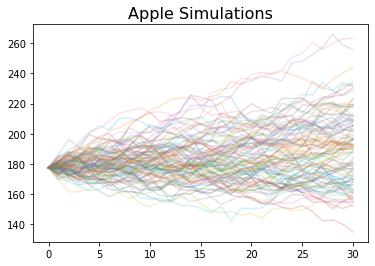

In [15]:

# Apple

T = 30 # How long is our simulation? Let's do 31 days (0 to 30 the way Python counts)
N = 30 # number of time points in the prediction time horizon, making this the same as T means that we will simulate daily returns 
S_0 = dsf_price_wide.AAPL[-1] # initial stock price
N_SIM = 100      # How many simulations to run?
mu = dsf_ret_wide.AAPL.mean()
sigma = dsf_ret_wide.AAPL.std()

gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations))

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)

ax.set_title('Apple Simulations', fontsize=16);

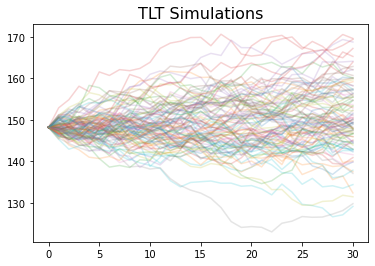

In [16]:
# TLT

T = 30 # How long is our simulation? Let's do 31 days (0 to 30 the way Python counts)
N = 30 # number of time points in the prediction time horizon, making this the same as T means that we will simulate daily returns 
S_0 = dsf_price_wide.TLT[-1] # initial stock price
N_SIM = 100      # How many simulations to run?
mu = dsf_ret_wide.TLT.mean()
sigma = dsf_ret_wide.TLT.std()

gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations))

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)

ax.set_title('TLT Simulations', fontsize=16);